# Model Description

A dissipation model was developed at the microcosm scale to estimate pesticide component dissipation in top-soil, i.e. degradation and leaching during infiltration. Partitioning between rainfall and runoff was determined using the Green-Ampt method (Green and Ampt, 1911; Mein and Larson, 1973). This simplification of the Richards equation (Richards, 1931) simulates overland flow when rainfall intensity overcomes the soil infiltration capacity. The retention and release of pesticide components in the top-soil was conceptualized using a mixing layer model (McGrath et al., 2008; Joyce et al., 2010). This approach assumes linear equilibrium sorption and adapts McGrath et al. (2008) by directly accounting for the leached volume such that:

$$ C(t+t_r) = C(t) \cdot exp\big( \frac{-V_{lch}}{ R~V_{H_2O} } \big) $$

$$ V_{lch} = h_{lch} \pi r^2 $$

$$ V_{H_2O} = \pi \cdot r^2 \cdot zl \cdot \theta_{sat} $$

$$ R = 1 + \frac{\rho_b K_d}{\theta_{sat}} $$

where $C$ is the concentration before $(t)$ and after $(t+ t_r)$ the leaching event, $(h_{lch})~[cm]$ is leached depth, $r~[cm]$ is the microcosm radius, $zl ~[cm]$ is the soil height and $\theta_{sat} ~ [cm^3 cm^{-3}]$ the constant volumetric water content (saturated capacity).



## Experimental set-up 

### Microcosm

In [1]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
zl = soil_height = 30  # Mixing layer depth in mm

### Soil Characteristics

In [2]:
''' Hydrological controlling parameters'''
# Alteck (Martine Trautmann, sampled pre-event)
porosity_crop = 0.61  # Crop soil
kSat_crop = 2.24  # mm/min (13.45 cm/h - Crop Soil)
kSat_crop2 = kSat_crop/100 
ov_1 = 0.25   # Initial water content m3. m-3
ov_2 = 0.20   # Initial water content m3. m-3
ovSat_crop = 0.45  # Saturated water content (assumed)
psi_crop = 1100  # soil suction Alteck (mm)
psi_crop2 = 617.0  # soil suction Alteck (mm)
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)

# Results

## Hydrology

In [3]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

# Plot graphs within this document
%matplotlib inline 
import mpld3
mpld3.enable_notebook()

# Plot graphs outside (for interaction)
# %matplotlib

### Hydrology - Annual Crop Soil (1st pulse)

In [4]:
water_data = leachsim(ovSat=ovSat_crop,
                      kSat=kSat_crop,
                      psi=psi_crop)

# Time
cum_time_30min = water_data[:, 0]

# Cummulative infiltration
cum_inf_135mmh = water_data[:, 4]
cum_inf_55mmh = water_data[:, 5] 
cum_inf_30mmh = water_data[:, 6] 

# Cummulative leaching
cum_leach_135mmh = water_data[:, 7]
cum_leach_55mmh = water_data[:, 8]
cum_leach_30mmh = water_data[:, 9]

# Ponding
roff_135mmh = water_data[:, 10]
roff_55mmh = water_data[:, 11]
roff_30mmh = water_data[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data[:, 13]
cum_roff_55mmh = water_data[:, 14]
cum_roff_30mmh = water_data[:, 15]

infil_135mmh = water_data[:, 16]
infil_55mmh = water_data[:, 17]
infil_30mmh = water_data[:, 18]

percol_data1 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

runoff_data1 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmh, cum_roff_30mmh)

infil_data1 = stackdata3(cum_time_30min,
                         infil_135mmh, infil_55mmh, infil_30mmh)

""" Observed Hydrlogy Annual Crop """
# all at 6 min, high inetnesity
leach_high_6min = np.array([16.253, 12.958, 17.536, 14.29])  

# all at 12 min, med intensity
leach_med_12min = np.array([10.089, 5.902, 13.981, 10.602]) 

# all at 30min, med intensity
leach_med_30min = np.array([49.197, 40.402, 45.772, 47.201])  

# all at 30min, low intensity
leach_low_30min = np.array([20.037, 17.508, 22.376, 20.085])  


Mass balance 0.0
Mass balance 0.0
Mass balance 0.0


### Percolation Crop (1st pulse)

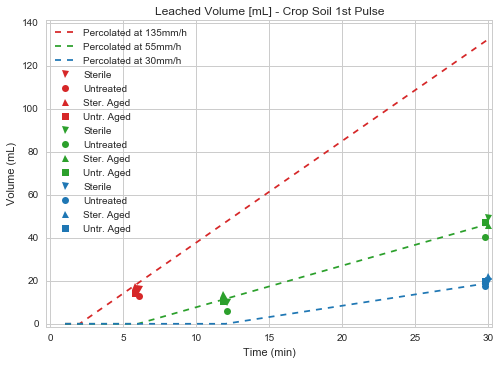

In [5]:
hydroplot(percol_data1, 
          "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h",
          leach_high_6min, 
          leach_med_12min, leach_med_30min, 
          leach_low_30min,
         "Leached Volume [mL] - Crop Soil 1st Pulse")

### Hydrology - Annual Crop Soil (2nd pulse)

In [6]:
''' Hydrological controlling parameters'''
# Alteck (Martine Trautmann, sampled pre-event)
porosity_crop = 0.61  # Crop soil
kSat_crop2 = kSat_crop/150 
ov_1 = 0.25   # Initial water content m3. m-3
ov_2 = 0.40  # Initial water content m3. m-3
ovSat_crop = 0.45  # Saturated water content (assumed)
psi_crop = 1100  # soil suction Alteck mm
psi_crop2 = 617  # soil suction Alteck mm
#  (Lefrancq, 2014: 61.7 cm , p.160; 110 cm, p.189)

In [7]:
water_data2 = leachsim(dtGA = 1,
                       ov=ov_2,
                       ovSat=ovSat_crop,
                       kSat=kSat_crop2,
                       psi=psi_crop,
                       soil_height=2.3)

G&A ponding during time step, with size: 0.16332266168214385
Mass balance -2.9103830456733704e-11
G&A ponding during time step, with size: 0.9863954292741665
Mass balance 4.3655745685100555e-11
G&A ponding during time step, with size: 0.38647608576140735
Mass balance -3.637978807091713e-12


**Extract hydrological time-series (volumes are in $mm^3$)**

In [8]:
# Time axis
cum_time_30min = water_data2[:, 0]

# Cumulative infiltration
cum_inf_135mmh = water_data2[:, 4]
cum_inf_55mmh = water_data2[:, 5]
cum_inf_30mmh = water_data2[:, 6]

# Cumulative leachate
cum_leach_135mmh = water_data2[:, 7]
cum_leach_55mmh = water_data2[:, 8]
cum_leach_30mmh = water_data2[:, 9]

# Ponding
roff_135mmh = water_data2[:, 10]
roff_55mmh = water_data2[:, 11]
roff_30mmh = water_data2[:, 12]

# Cummulative ponding
cum_roff_135mmh = water_data2[:, 13]
cum_roff_55mmh = water_data2[:, 14]
cum_roff_30mmh = water_data2[:, 15]

# Infiltration
infil_135mmh = water_data2[:, 16]
infil_55mmh = water_data2[:, 17]
infil_30mmh = water_data2[:, 18]

# Group each compartment for graphing
percol_data2 = stackdata3(cum_time_30min,
                          cum_leach_135mmh, cum_leach_55mmh, cum_leach_30mmh)

runoff_data2 = stackdata3(cum_time_30min,
                          cum_roff_135mmh, cum_roff_55mmh, cum_roff_30mmh)


infil_data2 = stackdata3(cum_time_30min,
                         infil_135mmh, infil_55mmh, infil_30mmh)

### Percolation Crop (2nd pulse)

**Observed Percolation Annual Crop - 2nd pulse**

In [9]:
# Order if array is:
#  [sterile, untreat, sterile_aged, untreat_aged]

# At 6 min, high inetnesity
leach_high_6min = np.array([14.192, 8.245, 2.410, 5.469]) 

# At 12 min, med intensity
leach_med_12min = np.array([18.672, 19.0, 0.830, 11.407]) 

# At 30min, med intensity
leach_med_30min = np.array([12.697, 2.473, 3.52, 20.291])  

# At 30min, low intensity
leach_low_30min = np.array([29.656, 9.375, 0.409, 3.385]) 

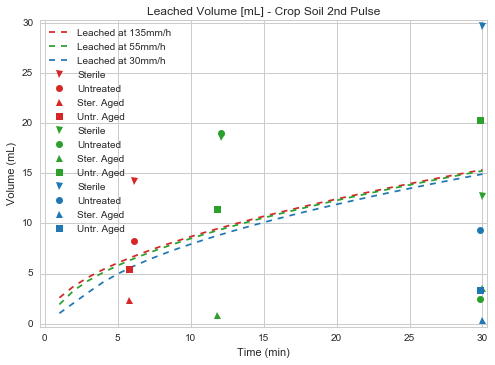

In [10]:
hydroplot(percol_data2, 
          "Leached at 135mm/h", "Leached at 55mm/h", "Leached at 30mm/h",
          leach_high_6min, 
          leach_med_12min, leach_med_30min, 
          leach_low_30min,
         "Leached Volume [mL] - Crop Soil 2nd Pulse")

### Ponding Crop (2nd pulse only)

**Observed Ponding Annual Crop - 2nd pulse**

In [11]:
# [sterile, untreat, sterile_aged, untreat_aged]
# all at 6 min, high inetnesity
roff_high_6min = np.array([10.824, 20.935, 24.75, 19.041])  

# all at 12 min, med intensity
roff_med_12min = np.array([0, 3.907, 19.436, 7.313]) 

# all at 30min, med intensity
roff_med_30min = np.array([43.764, 28.911, 51.964, 33.478])  

# all at 30min, low intensity
roff_low_30min = np.array([0, 22.618, 28.598, 27.314])  


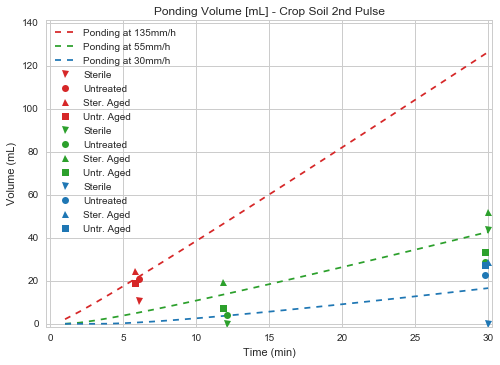

In [12]:
# Plot ponding simulations from second pulse.
hydroplot(runoff_data2, 
          "Ponding at 135mm/h", "Ponding at 55mm/h", "Ponding at 30mm/h",
          roff_high_6min, 
          roff_med_12min, roff_med_30min, 
          roff_low_30min,
         "Ponding Volume [mL] - Crop Soil 2nd Pulse")

# Contaminants - Crop Soil

In [13]:
from pestmob import *
from mixinglayer import *

In [14]:
# Soil characteristics
pb_crop = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3
porosity_crop = 0.61  # Crop soil


# Assumed (used to calculate Reynolds number)
runoff_vel = 1.0  # mm/min

# Fraction organic matter and carbon (Scenario 1)
fom_crop_sterile = 3.87/100.0
fom_crop_untreat = 5.51/100.0
foc_crop_sterile = 0.58*fom_crop_sterile
foc_crop_untreat = 0.58*fom_crop_untreat

# Soil characteristics (OC Black & Walkley - Scenario 2)
foc_crop_untreat2 = 2.04/100
foc_crop_sterile2 = 0.70*foc_crop_untreat2

### Metalaxyl - Crop Soil (1st pulse)

** Initial and observed mass in leachate - Crop Soil, 1st Pulse**

In [15]:
# Initial contaminant mass in samples
mx_ini_sterile = (1818.1+1472.7) / float(2)  
mx_ini_untreated = (1518.1+1413.3) / float(2)  

mx_ini = [mx_ini_sterile, mx_ini_untreated]

In [16]:
# Observed Metalaxyl Output - Crop
# high, med-12, med-30, low
mx_obs_sterile_crop = np.array([(138.1+207.1)/2.0,
                                (201.0+50.4)/2.0, (641.8+356.8)/2.0,
                                (177.0+293.5)/2.0])  
mx_obs_untreat_crop = np.array([(145.4+283.5)/2.0,
                                (158.4+262.3)/2.0, (674.9+360.2)/2.0,
                                (418.2+480.9)/2.0])

mx_sol = [mx_obs_sterile_crop, mx_obs_untreat_crop]

In [17]:
# Pesticide Koc 
Koc_mexyl = [163.0, 50.0, 30]  # [(a) , (b), (c)] [ml/g] 
Koc_mexyl = np.array(Koc_mexyl)*10**3  # [mm3/g]

# Kd (a) - NPIC @ http://npic.orst.edu/ingred/ppdmove.htm
Kd_mexylA_crop_sterile = Koc_mexyl[0]*foc_crop_sterile  
Kd_mexylA_crop_untreat = Koc_mexyl[0]*foc_crop_untreat

# Kd (b) - PAN @ http://www.pesticideinfo.org/
Kd_mexylB_crop_sterile = Koc_mexyl[1]*foc_crop_sterile  
Kd_mexylB_crop_untreat = Koc_mexyl[1]*foc_crop_untreat

# Kd (c) - https://toxnet.nlm.nih.gov/cgi-bin/sis/search/a?dbs+hsdb:@term+@DOCNO+7061
Kd_mexylC_crop_sterile = Koc_mexyl[2]*foc_crop_sterile  
Kd_mexylC_crop_untreat = Koc_mexyl[2]*foc_crop_untreat

Kd_mexyl = [Kd_mexylA_crop_sterile, Kd_mexylA_crop_untreat, 
            Kd_mexylB_crop_sterile, Kd_mexylB_crop_untreat,
            Kd_mexylC_crop_sterile, Kd_mexylC_crop_untreat]


In [18]:
# Any length unit input must be: "mm"
cum_mx_crop = pest_test(Kd_mexyl,
                        pb_crop,
                        ovSat_crop,
                        percol_data1, runoff_data1, infil_data1,
                        area, soil_height, 
                        mx_ini,
                        mx_sol,
                        d, runoff_vel, dtGA=1)

Best log Kd (sterile):  3.5633265629858064 ( Num:  1 ) 
 Error:  0.325900966064
Best log Kd (untreat):  3.203549596750741 ( Num:  4 ) 
 Error:  0.575876959795


**Extract calculated mass per compartment (units are in $\mu g $)**

In [19]:
# Time axis
cum_time_30min = cum_mx_crop[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_mx_crop[:, 1]
cum_mass_leach_st_55mmh = cum_mx_crop[:, 2]
cum_mass_leach_st_30mmh = cum_mx_crop[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_mx_crop[:, 4]
cum_mass_leach_un_55mmh = cum_mx_crop[:, 5]
cum_mass_leach_un_30mmh = cum_mx_crop[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_mx_crop[:, 7]
mass_leach_st_55mmh = cum_mx_crop[:, 8]
mass_leach_st_30mmh = cum_mx_crop[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_mx_crop[:, 10]
mass_leach_un_55mmh = cum_mx_crop[:, 11]
mass_leach_un_30mmh = cum_mx_crop[:, 12]


# Group each compartment for graphing
cum_leach_mx_crop = stackdata6(cum_time_30min,
                               cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
                               cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)

# NO RUN OFF OBSERVED

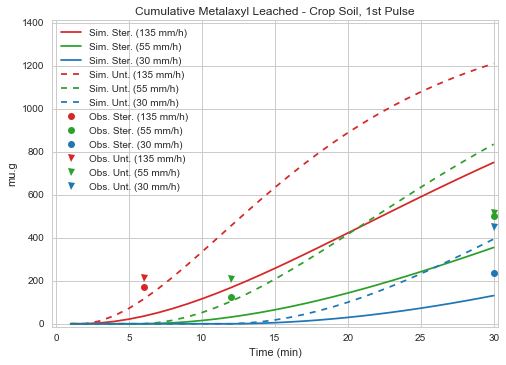

In [20]:
pestiplot(cum_leach_mx_crop, 
          mx_obs_sterile_crop, mx_obs_untreat_crop, 
          'Cumulative Metalaxyl Leached - Crop Soil, 1st Pulse')

Uncomment the following line to see leaching rate for metalaxyl during the first pulse. 

In [21]:
# pestiplot_inst(cum_mx_crop, 
#               mx_obs_sterile_crop, mx_obs_untreat_crop, 
#               'Metalaxyl Leaching Rate - Annual Crop Soil')

### Metalaxyl - Crop Soil (2nd pulse)

** Initial and observed mass in leachate - Crop Soil, 2nd Pulse**

In [22]:
# Initial mass
mx_ini_sterile_list = [1496.75, 1440.72, 1047.95, 1462.08, # 0 days
                       1127.52, 1267.11, 994.09, 1050.48] # 10 days

mx_ini_untreat_list = [1222.86, 1211.28, 751.13, 979.82,  # 0 days
                       1006.54, 1025.43, 938.23, 830.68]  # 10 days
                       
mx_ini_sterile = sum(mx_ini_sterile_list) / len(mx_ini_sterile_list)  
mx_ini_untreated = sum(mx_ini_untreat_list) / len(mx_ini_untreat_list)  


mx_ini = [mx_ini_sterile, mx_ini_untreated]

# Observed Metalaxyl Leachate - Crop
# high, med-12, med-30, low
mx_obs_sterile_crop = np.array([(8.35 + 37.57)/2.0,
                                (290.27)/1.0, (93.29+82.15)/2.0,
                                (285.29)/1.0])  


mx_obs_untreat_crop = np.array([(175.44+40.03)/2.0,
                                (272.48+168.51)/2.0, (35.12+146.10)/2.0,
                                (86.01+76.49)/2.0])

mx_sol = [mx_obs_sterile_crop, mx_obs_untreat_crop]

** Leachate mass simulations **

In [23]:
# Any length unit input must be: "mm"
cum_mx_crop2 = pest_test(Kd_mexyl,
                        pb_crop,
                        ovSat_crop,
                        percol_data2, runoff_data2, infil_data2,
                        area, soil_height, 
                        mx_ini,
                        mx_sol,
                        d, runoff_vel, dtGA=1)

mass -> pond:  -1.02796566362 at:  1
conc liq:  0.00534085403976
conc in of :  0.0678175153724
mass -> pond:  -0.750865195753 at:  1
conc liq:  0.00392227484557
conc in of :  0.0495576031466
mass -> pond:  -2.59280168737 at:  1
conc liq:  0.0130118978642
conc in of :  0.170594586331
mass -> pond:  -2.01724967639 at:  1
conc liq:  0.0102623191396
conc in of :  0.132864687405
mass -> pond:  -3.54745554961 at:  1
conc liq:  0.0173631888533
conc in of :  0.232966867856
mass -> pond:  -2.87476041193 at:  1
conc liq:  0.0143253791527
conc in of :  0.189044670881
mass -> pond:  -0.828258532921 at:  1
conc liq:  0.00430326428991
conc in of :  0.0546423268564
mass -> pond:  -0.60499151622 at:  1
conc liq:  0.00316027832862
conc in of :  0.0399298431163
mass -> pond:  -2.08908740607 at:  1
conc liq:  0.0104840227811
conc in of :  0.137452472197
mass -> pond:  -1.6253502589 at:  1
conc liq:  0.00826861605959
conc in of :  0.107052516403
mass -> pond:  -2.85827672373 at:  1
conc liq:  0.0139899705

In [24]:
# Time axis
cum_time_30min = cum_mx_crop2[:, 0]

# Cumulative leachate sterilized
cum_mass_leach_st_135mmh = cum_mx_crop2[:, 1]
cum_mass_leach_st_55mmh = cum_mx_crop2[:, 2]
cum_mass_leach_st_30mmh = cum_mx_crop2[:, 3]

# Cumulative leachate untreated
cum_mass_leach_un_135mmh = cum_mx_crop2[:, 4]
cum_mass_leach_un_55mmh = cum_mx_crop2[:, 5]
cum_mass_leach_un_30mmh = cum_mx_crop2[:, 6]

# Leachate sterilized
mass_leach_st_135mmh = cum_mx_crop2[:, 7]
mass_leach_st_55mmh = cum_mx_crop2[:, 8]
mass_leach_st_30mmh = cum_mx_crop2[:, 9]

# Leachate untreated
mass_leach_un_135mmh = cum_mx_crop2[:, 10]
mass_leach_un_55mmh = cum_mx_crop2[:, 11]
mass_leach_un_30mmh = cum_mx_crop2[:, 12]

mass_percol2 = stackdata6(cum_time_30min,
        cum_mass_leach_st_135mmh, cum_mass_leach_st_55mmh, cum_mass_leach_st_30mmh,
        cum_mass_leach_un_135mmh, cum_mass_leach_un_55mmh, cum_mass_leach_un_30mmh)


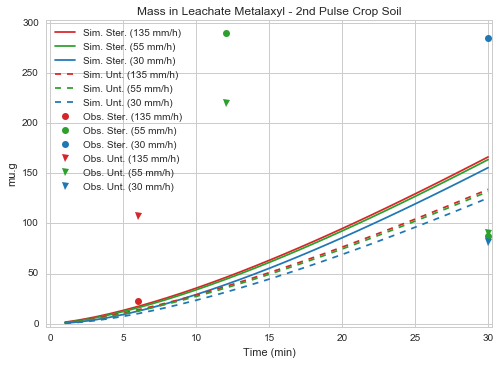

In [25]:
pestiplot(mass_percol2,
          mx_obs_sterile_crop, mx_obs_untreat_crop,
          'Mass in Leachate Metalaxyl - 2nd Pulse Crop Soil')

** Ponding Mass ** 

In [26]:
# Ponding sterilized
mass_runoff_st_135mmh = cum_mx_crop2[:, 13]
mass_runoff_st_55mmh = cum_mx_crop2[:, 14]
mass_runoff_st_30mmh = cum_mx_crop2[:, 15]

# Ponding untreated
mass_runoff_un_135mmh = cum_mx_crop2[:, 16]
mass_runoff_un_55mmh = cum_mx_crop2[:, 17]
mass_runoff_un_30mmh = cum_mx_crop2[:, 18]

mass_overflow2 = stackdata6(cum_time_30min,
        mass_runoff_st_135mmh, mass_runoff_st_55mmh, mass_runoff_st_30mmh,
        mass_runoff_un_135mmh, mass_runoff_un_55mmh, mass_runoff_un_30mmh)

** Initial and observed mass in ponding - Crop Soil, 2nd Pulse**

In [27]:
# Observed Metalaxyl in Ponding - Crop
# high, med-12, med-30, low
mx_obs_sterile_crop_roff = np.array([(5.74 + 4.07)/2.0,
                                (9.16)/1.0, (4.34+14.03)/2.0,
                                (12.42)/1.0])  
 
mx_obs_untreat_crop_roff = np.array([(4.72 + 3.17)/2.0,
                                (1.84)/1.0, (8.90+0.14)/2.0,
                                (5.82+9.65)/1.0]) 

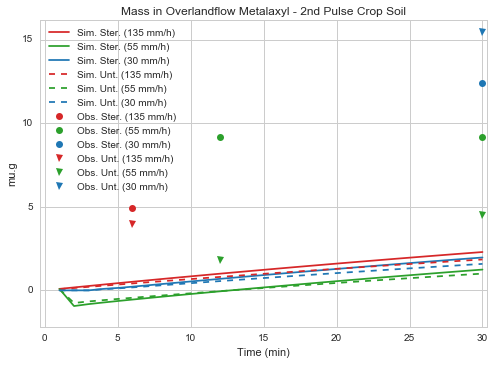

In [28]:
pestiplot(mass_overflow2,
          mx_obs_sterile_crop_roff, mx_obs_untreat_crop_roff,
          'Mass in Overlandflow Metalaxyl - 2nd Pulse Crop Soil')

### S-metolachlor - Crop (1st pulse)

In [29]:
# Initial mass, all intensities
mr_ini_sterile = (5176.9+4213.1)/float(2)  
mr_ini_untreated = (3460.8+2832.7)/float(2) 

# Observed Metolachlor Output - Crop
# high-6, med-12, med-30, low-30
mr_obs_sterile_crop = np.array([(65.7+77.7)/2.0,
                                (79.5+16.9)/2.0, (327.4+153.4)/2.0,
                                (70.9+110.7)/2.0])  
mr_obs_untreat_crop = np.array([(53.5+89.2)/2.0,
                                (49.4+70.5)/2.0, (281.7+116.4)/2.0,
                                (142.7+127.2)/2.0])

mr_ini = [mr_ini_sterile, mr_ini_untreated]
mr_sol = [mr_obs_sterile_crop, mr_obs_untreat_crop]

In [30]:
# Soil characteristics (defined above)
fom_crop_sterile = 3.87/100.0
fom_crop_untreat = 5.51/100.0
foc_crop_sterile = 0.58*fom_crop_sterile
foc_crop_untreat = 0.58*fom_crop_untreat

# Koc Ranges (EU COmmision SANCO/1426/2001 - rev. 3. 4 October 2004)
Koc_smeto = [369, 200, 110, 21]  # [ml/g]

# Kd (S-metolachlor)
Kd_smeto_crop_sterile1 = Koc_smeto[0]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat1 = Koc_smeto[0]*foc_crop_untreat
Kd_smeto_crop_sterile2 = Koc_smeto[1]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat2 = Koc_smeto[1]*foc_crop_untreat 
Kd_smeto_crop_sterile3 = Koc_smeto[2]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat3 = Koc_smeto[2]*foc_crop_untreat 
Kd_smeto_crop_sterile4 = Koc_smeto[3]*foc_crop_sterile  # ml/g
Kd_smeto_crop_untreat4 = Koc_smeto[3]*foc_crop_untreat 

Kd_smeto = [Kd_smeto_crop_sterile1, Kd_smeto_crop_untreat1, 
            Kd_smeto_crop_sterile2, Kd_smeto_crop_untreat2, 
            Kd_smeto_crop_sterile3, Kd_smeto_crop_untreat3, 
            Kd_smeto_crop_sterile4, Kd_smeto_crop_untreat4]


In [31]:
cum_mr_crop = pest_test(Kd_smeto,
                        pb_crop,
                        ovSat_crop,
                        percol_data1,
                        area, soil_height,
                        mr_ini,
                        mr_sol)

pestiplot(cum_mr_crop, 
          mr_obs_sterile_crop, mr_obs_untreat_crop, 
          'Cumulative S-metolachlor - Annual Crop Soil')


TypeError: pest_test() missing 5 required positional arguments: 'mass_ini', 'pest_sol', 'd', 'runoffvelocity', and 'dtGA'

Uncomment the following line to see leaching rate for S-metolachlor during the first pulse. 

In [ ]:
# pestiplot_inst(cum_mr_crop, 
#               mr_obs_sterile_crop, mr_obs_untreat_crop, 
#               'S-metolachlor Leaching Rate - Annual Crop Soil')

### Copper - Crop (1st pulse)

In [ ]:
# Initial mass
mass_ini_sterile = (1627 + 1107) / float(2)  # all intensities:{0d, 10d)
mass_ini_untreated = (1184 + 1177) / float(2)

# Observed Cupper Output at 6min, 12min, 30min, 30min @ 135, 55, 55, 30mm/h
cu_sol_sterile = np.array([11.29, 11.63, 306.80, 21.08])
cu_sol_untreat = np.array([0.5, 1.405, 37.0, 1])

cu_ini = [mass_ini_sterile, mass_ini_untreated]
cu_sol = [cu_sol_sterile, cu_sol_untreat]

In [ ]:
# Kd (Copper). Allison and Allison, 2005 - EPA/600/R-05/074: 
# log(Kd) range: 0.1 - 7.0, max-mean = 5.5

Kd_copper1 = 10**0.1  # [mL/g] = [L/Kg] 
Kd_copper2 = 10**0.5  # [mL/g] = [L/Kg] 
Kd_copper3 = 10**0.6  # [mL/g] = [L/Kg] 
Kd_copper4 = 10**1.7  # [mL/g] = [L/Kg] 
Kd_copper5 = 10**2.7  # [mL/g] = [L/Kg]

Kd_copper = [Kd_copper1, Kd_copper2, Kd_copper3, Kd_copper4, Kd_copper5]

In [ ]:
cum_copper_Alteck = pest_test(Kd_copper,
                              pb_crop,
                              ovSat_crop,
                              percol_data1,
                              area, soil_height,
                              cu_ini,
                              cu_sol)

In [ ]:
pestiplot(cum_copper_Alteck, 
          cu_sol_sterile, cu_sol_untreat, 
          'Cumulative Cu - Annual Crop Soil')

In [ ]:
#pestiplot_inst(cum_copper_Alteck, 
#               cu_sol_sterile, cu_sol_untreat, 
#               'Cu Leach Rate - Annual Crop Soil')

### Zinc - Annual Crop

In [ ]:
mass_ini_sterile = (3106 + 2594) / float(2) 
mass_ini_untreated = (2636 + 2586) / float(2)

zn_ini = [mass_ini_sterile, mass_ini_untreated]

In [ ]:
# Observed Zinc Output
zn_sol_sterile = np.array([17, 17, 404.25, 30.13])
zn_sol_untreat = np.array([2.19, 2, 36.85, 3.09])

zn_sol = [zn_sol_sterile, zn_sol_untreat]

In [ ]:
# Kd (Zinc) Allison and Allison, 2005 - EPA/600/R-05/074:  
# log(Kd) range: 1.5 - 6.9
Kd_zinc1 = 10**0.5  # [mL/g] = [L/Kg] 
Kd_zinc2 = 10**0.8
Kd_zinc3 = 10**1.0
Kd_zinc4 = 10**1.5

Kd_zinc = [Kd_zinc1, Kd_zinc2, Kd_zinc3, Kd_zinc4]

In [ ]:
cum_zinc_Alteck = pest_test(Kd_zinc,
                            pb_crop,
                            ovSat_crop,
                            percol_data1,
                            area, soil_height,
                            zn_ini,
                            zn_sol)

In [ ]:
pestiplot(cum_zinc_Alteck, 
          zn_sol_sterile, zn_sol_untreat, 
          'Cumulative Zn - Annual Crop Soil')

In [ ]:
#pestiplot_inst(cum_zinc_Alteck, 
#               zn_sol_sterile, zn_sol_untreat, 
#               'Zn Leach Rate - Annual Crop Soil')

## Literature parameters

### Retardation model ($K_d$)

Source: Allisson and Allison, 2005 (EPA/600/R-05/074)

| Metal (log $K_d$ [L/kg]$ | Soil/Water | Suspended Matter/ Water | Sediment/ Water | DOC/ Water |
|--------------------------|------------|-------------------------|-----------------|------------|
| Cu (mean)                | 2.7        | 4.7                     | 4.2             | 5.5        |
| Zn (mean)                | 3.1        | 5.1                     | 3.7             | 4.9        |